In [1]:
#Shah Md Golam Morshed
#ID:2114951060

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load graph.csv
graph_file_path = '/content/drive/MyDrive/myfile/graph.csv'
graph_df = pd.read_csv(graph_file_path)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in graph_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

print("Graph loaded with nodes and edges:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Load content.csv
content_file_path = '/content/drive/MyDrive/myfile/content.csv'
content_df = pd.read_csv(content_file_path)

print("Contents loaded from content.csv:")
print(content_df.head())

Graph loaded with nodes and edges:
Number of nodes: 28
Number of edges: 30
Contents loaded from content.csv:
                                           URL  \
0         https://learnpython.com/introduction   
1               https://learnpython.com/basics   
2  https://aiworld.com/artificial-intelligence   
3         https://aiworld.com/machine-learning   
4          https://datasciencehub.com/overview   

                              Title  \
0            Introduction to Python   
1                     Python Basics   
2  What is Artificial Intelligence?   
3    Understanding Machine Learning   
4             What is Data Science?   

                                             Content  
0  Python is a versatile programming language use...  
1  The basics of Python include variables, loops,...  
2  Artificial Intelligence (AI) refers to the sim...  
3  Machine Learning (ML) is a subset of AI that e...  
4  Data Science combines statistics, programming,...  


In [6]:
graph_df

,Source,Target
0,https://learnpython.com/introduction,https://learnpython.com/basics
1,https://learnpython.com/introduction,https://datasciencehub.com/overview
2,https://learnpython.com/basics,https://datasciencehub.com/statistics
3,https://aiworld.com/artificial-intelligence,https://aiworld.com/machine-learning
4,https://aiworld.com/machine-learning,https://datasciencehub.com/tools
5,https://datasciencehub.com/overview,https://datasciencehub.com/tools
6,https://datasciencehub.com/tools,https://datasciencehub.com/statistics
7,https://datasciencehub.com/big-data,https://datasciencehub.com/deep-learning
8,https://datasciencehub.com/big-data,https://datasciencehub.com/time-series-analysis
9,https://datasciencehub.com/deep-learning,https://aiworld.com/natural-language-processing


In [8]:
content_df

,URL,Title,Content
0,https://learnpython.com/introduction,Introduction to Python,Python is a versatile programming language use...
1,https://learnpython.com/basics,Python Basics,"The basics of Python include variables, loops,..."
2,https://aiworld.com/artificial-intelligence,What is Artificial Intelligence?,Artificial Intelligence (AI) refers to the sim...
3,https://aiworld.com/machine-learning,Understanding Machine Learning,Machine Learning (ML) is a subset of AI that e...
4,https://datasciencehub.com/overview,What is Data Science?,"Data Science combines statistics, programming,..."
5,https://datasciencehub.com/tools,Top Data Science Tools,Popular tools in data science include Jupyter ...
6,https://webdevworld.com/html-css,HTML and CSS Basics,HTML (HyperText Markup Language) is the standa...
7,https://webdevworld.com/javascript,Introduction to JavaScript,JavaScript is a programming language used to a...
8,https://blockchaininsights.com/technology,Understanding Blockchain Technology,Blockchain is a decentralized ledger technolog...
9,https://blockchaininsights.com/cryptocurrencies,Cryptocurrencies Explained,Cryptocurrencies are digital currencies built ...


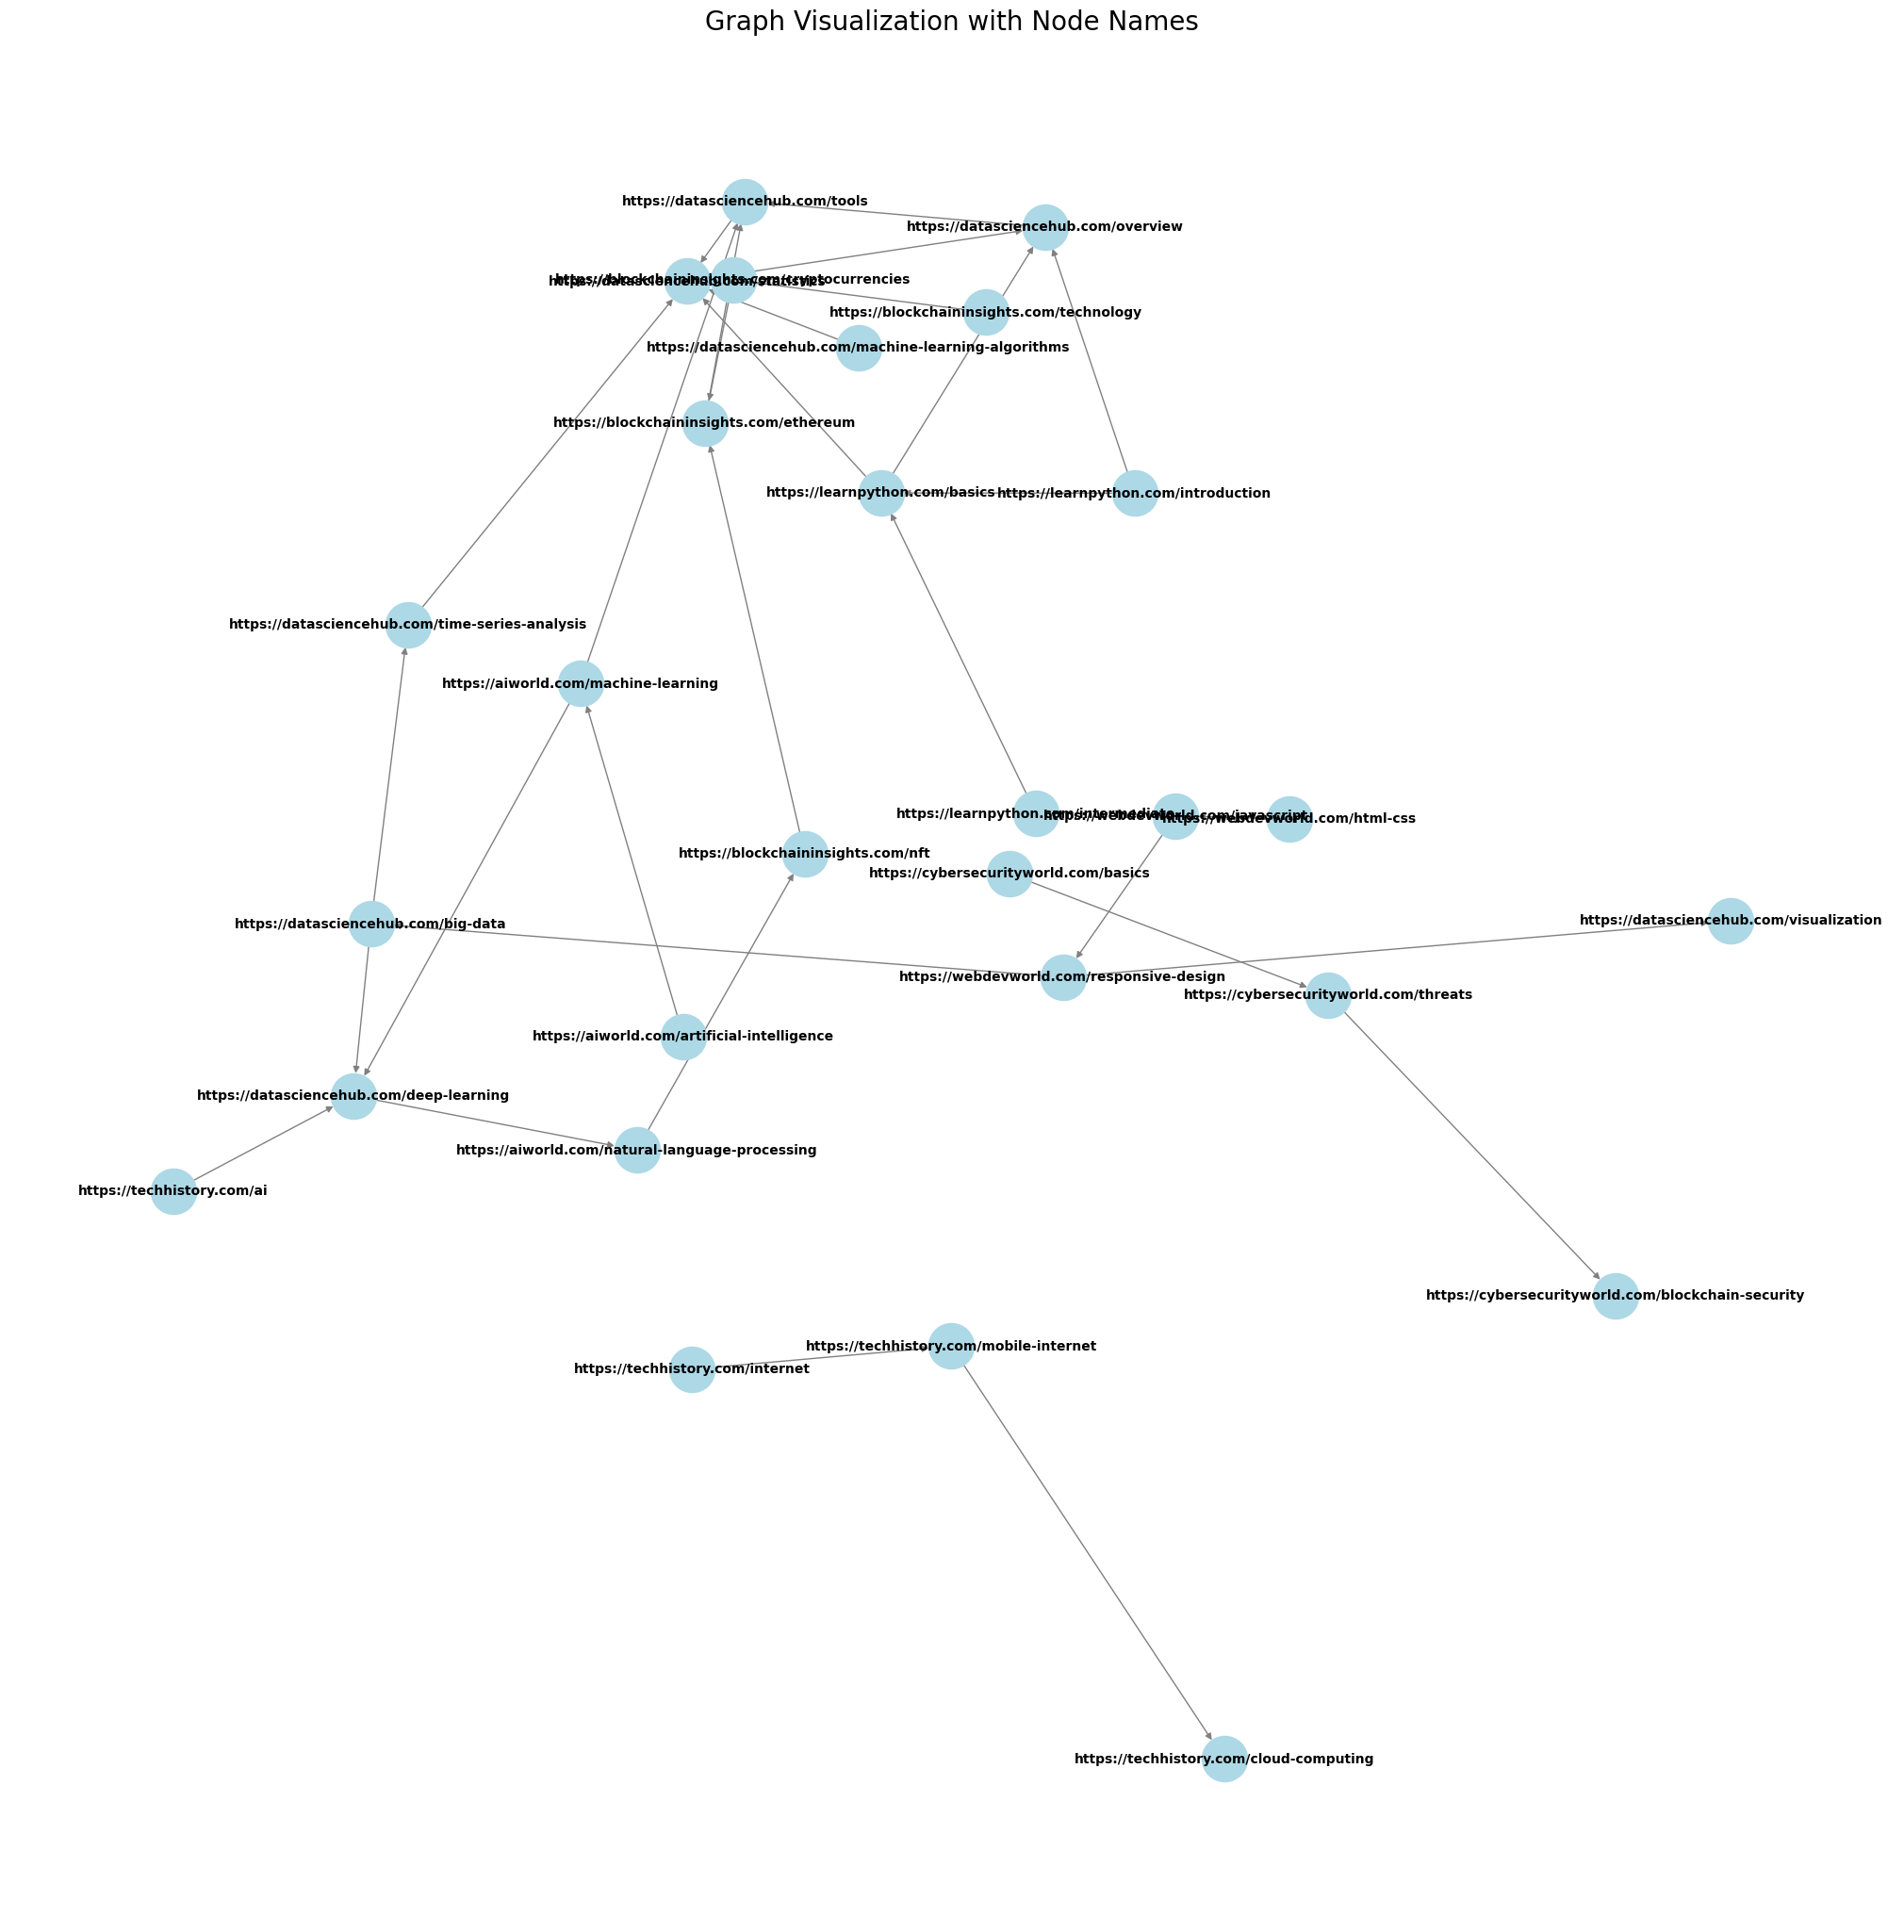

In [21]:
# Create a larger figure of the graph with optimized layout
plt.figure(figsize=(20, 20))  # Significantly larger figure size for clarity
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Adjust the spring layout for better spacing

nx.draw(
    G,
    pos,
    with_labels=True,
    labels={node: node for node in G.nodes()},  # Ensure node names are displayed
    node_size=1200,  # Larger nodes
    node_color="lightblue",
    font_size=10,  # Increase font size
    font_weight="bold",
    edge_color="gray"
)

plt.title("Graph Visualization with Node Names", fontsize=20)
plt.show()


In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')
# Re-download necessary NLTK resources to fix the issue
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize contents and remove stopwords
try:
    stop_words = set(stopwords.words('english'))

    # Ensure that 'Content' column exists and is processed correctly
    if 'Content' in content_df.columns:
        content_df['Tokenized'] = content_df['Content'].apply(
            lambda x: [word for word in word_tokenize(str(x).lower()) if word.isalnum() and word not in stop_words]
        )
        print("Tokenized contents with stopwords removed:")
        print(content_df[['Content', 'Tokenized']].head())
    else:
        print("Error: Column 'Content' not found in the DataFrame.")
except Exception as e:
    print("An error occurred during processing:", str(e))



Tokenized contents with stopwords removed:
                                             Content  \
0  Python is a versatile programming language use...   
1  The basics of Python include variables, loops,...   
2  Artificial Intelligence (AI) refers to the sim...   
3  Machine Learning (ML) is a subset of AI that e...   
4  Data Science combines statistics, programming,...   

                                           Tokenized  
0  [python, versatile, programming, language, use...  
1  [basics, python, include, variables, loops, co...  
2  [artificial, intelligence, ai, refers, simulat...  
3  [machine, learning, ml, subset, ai, enables, c...  
4  [data, science, combines, statistics, programm...  


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Prepare web content dictionary using URL as the key and Content as the value
web_content = dict(zip(content_df['URL'], content_df['Content']))

# Define the inverted_index function
def inverted_index(web_content):
    inverted_index = {}
    for website, content in web_content.items():
        words = content.lower().split()
        for word in words:
            word = word.strip(",.!?")  # Remove punctuation
            if word not in inverted_index:
                inverted_index[word] = []
            inverted_index[word].append(website)
    return inverted_index

# Build the inverted index
index = inverted_index(web_content)

# Print the inverted index
print("\nInverted Index:")
for word, websites in index.items():
    print(f"{word}: {websites}")



Inverted Index:
python: ['https://learnpython.com/introduction', 'https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://learnpython.com/basics', 'https://datasciencehub.com/tools']
is: ['https://learnpython.com/introduction', 'https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://aiworld.com/machine-learning', 'https://datasciencehub.com/overview', 'https://webdevworld.com/html-css', 'https://webdevworld.com/html-css', 'https://webdevworld.com/javascript', 'https://blockchaininsights.com/technology']
a: ['https://learnpython.com/introduction', 'https://aiworld.com/machine-learning', 'https://webdevworld.com/javascript', 'https://blockchaininsights.com/technology', 'https://techhistory.com/internet', 'https://techhistory.com/internet']
versatile: ['https://learnpython.com/introduction']
programming: ['https://learnpython.com/introduction', 'https://datasciencehub.com/overview', 'https://webdevworld.com/javascript']
language: ['htt

In [19]:
import pandas as pd
import networkx as nx

# Build the graph from graph_df
G = nx.DiGraph()
for _, row in graph_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Compute PageRank
page_ranks = nx.pagerank(G)

# Prepare the web content dictionary from content_df
web_content = dict(zip(content_df['URL'], content_df['Content']))

# Define the inverted index function
def inverted_index(web_content):
    index = {}
    for url, content in web_content.items():
        words = content.lower().split()
        for word in words:
            word = word.strip(",.!?")
            if word not in index:
                index[word] = []
            index[word].append(url)
    return index

# Build the inverted index
index = inverted_index(web_content)

# Define the search function
def search(query, inverted_index, page_ranks):
    query = query.lower().strip(",.!?")
    if query not in inverted_index:
        return []
    urls = inverted_index[query]
    return sorted(urls, key=lambda url: page_ranks.get(url, 0), reverse=True)

# Example query
query = "python"
results = search(query, index, page_ranks)

# Display search results
for rank, url in enumerate(results, start=1):
    print(f"{rank}. {url} (PageRank: {page_ranks.get(url, 0):.4f})")


1. https://datasciencehub.com/tools (PageRank: 0.2203)
2. https://learnpython.com/basics (PageRank: 0.0156)
3. https://learnpython.com/basics (PageRank: 0.0156)
4. https://learnpython.com/introduction (PageRank: 0.0069)
5. https://learnpython.com/introduction (PageRank: 0.0069)


In [24]:

# Define the bag-of-words search function
def bag_of_words_search(query, inverted_index, page_ranks):
    query_words = query.lower().split()
    result_urls = set()

    # Find all URLs containing any of the query words
    for word in query_words:
        word = word.strip(",.!?")
        if word in inverted_index:
            result_urls.update(inverted_index[word])

    # Sort the results by PageRank
    ranked_results = sorted(result_urls, key=lambda url: page_ranks.get(url, 0), reverse=True)
    return ranked_results

# Example query
query = "python machine learning"
results = bag_of_words_search(query, index, page_ranks)

# Display search results
print(f"\nSearch results for '{query}':")
for rank, url in enumerate(results, start=1):
    print(f"{rank}. {url} (PageRank: {page_ranks.get(url, 0):.4f})")




Search results for 'python machine learning':
1. https://datasciencehub.com/tools (PageRank: 0.2203)
2. https://datasciencehub.com/overview (PageRank: 0.2014)
3. https://learnpython.com/basics (PageRank: 0.0156)
4. https://aiworld.com/machine-learning (PageRank: 0.0127)
5. https://techhistory.com/ai (PageRank: 0.0069)
6. https://learnpython.com/introduction (PageRank: 0.0069)
